### Challenge06 Chris Buie

### Topic: Classification Metrics

##### **Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.

Data: congressional votes Congressional Voting Records Dataset


In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark-palette')

#load models:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#load sklearn metrics:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



In [317]:
# Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None, sep=",")
df.replace('?', np.NaN,inplace=True)
df.replace('y',np.int(1),inplace=True)
df.replace('n', np.int(0),inplace=True)
df.fillna(np.round(df.mean(),0),inplace=True)

X = df.iloc[:,1:]
y = df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

#### Exercise 6.1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [318]:
models = [GaussianNB(),SVC(probability=True),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()]
names = 'GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),LogisticRegression()'
names = names.split(",")

for i in range(len(models)):
    model = models[i]
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    score = accuracy_score(y_test,y_pred); 
    print names[i],' accuracy_score :',score
print " "
for i in range(len(models)):
    model = models[i]
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    score = precision_score(y_test,y_pred,pos_label='republican'); 
    print names[i],' precision_score :',score
print " "  
for i in range(len(models)):
    model = models[i]
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    score = recall_score(y_test,y_pred , pos_label='republican'); 
    print names[i],' recall_score :',score
print " "    
for i in range(len(models)):
    model = models[i]
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    score = f1_score(y_test,y_pred, pos_label='republican'); 
    print names[i],' f1_score :',score

GaussianNB()  accuracy_score : 0.93893129771
SVC()  accuracy_score : 0.954198473282
DecisionTreeClassifier()  accuracy_score : 0.931297709924
RandomForestClassifier()  accuracy_score : 0.946564885496
KNeighborsClassifier()  accuracy_score : 0.916030534351
LogisticRegression()  accuracy_score : 0.93893129771
 
GaussianNB()  precision_score : 0.96
SVC()  precision_score : 0.961538461538
DecisionTreeClassifier()  precision_score : 0.924528301887
RandomForestClassifier()  precision_score : 0.96
KNeighborsClassifier()  precision_score : 0.905660377358
LogisticRegression()  precision_score : 0.96
 
GaussianNB()  recall_score : 0.888888888889
SVC()  recall_score : 0.925925925926
DecisionTreeClassifier()  recall_score : 0.888888888889
RandomForestClassifier()  recall_score : 0.944444444444
KNeighborsClassifier()  recall_score : 0.888888888889
LogisticRegression()  recall_score : 0.888888888889
 
GaussianNB()  f1_score : 0.923076923077
SVC()  f1_score : 0.943396226415
DecisionTreeClassifier()  

#### Exercise 6.2

For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.


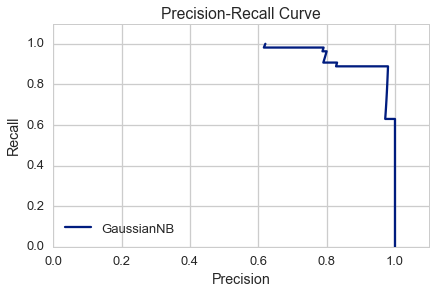

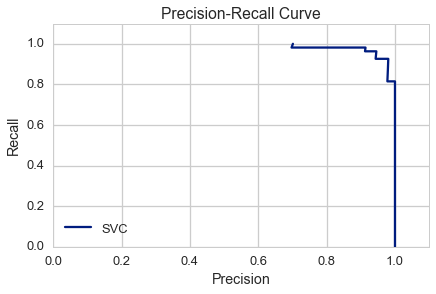

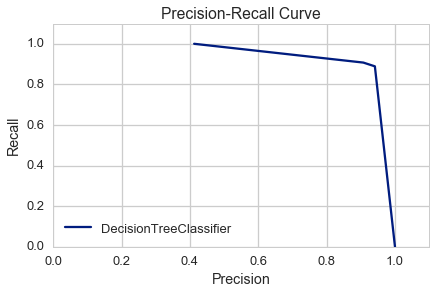

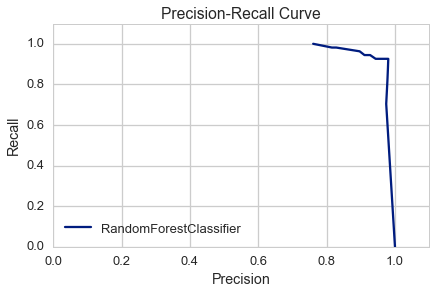

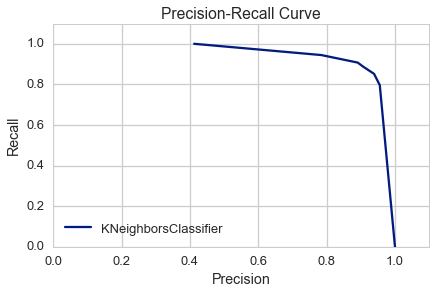

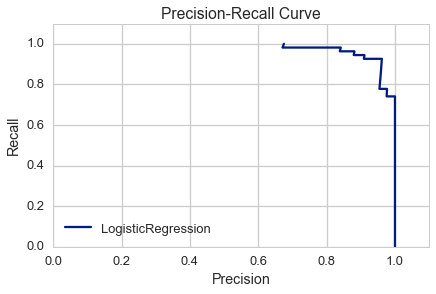

In [319]:
for model in models:
    prob = model.fit(X_train, y_train).predict_proba(X_test)
    precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican')
    fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
    plt.subplots()
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.plot(precision, recall, label=model.__str__().split('(')[0])
    plt.legend(loc='lower left',fancybox=True, shadow=True)

    
    


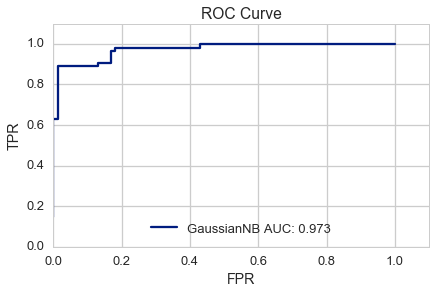

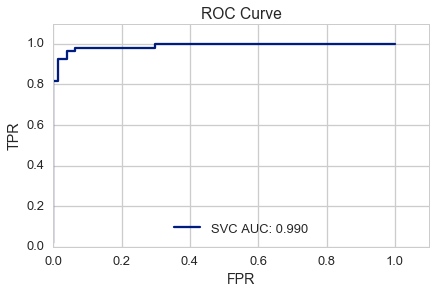

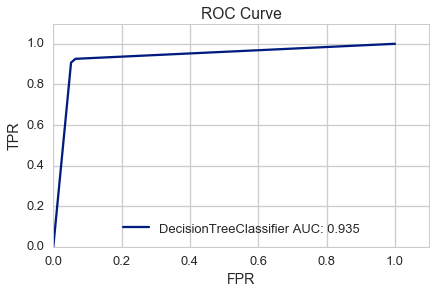

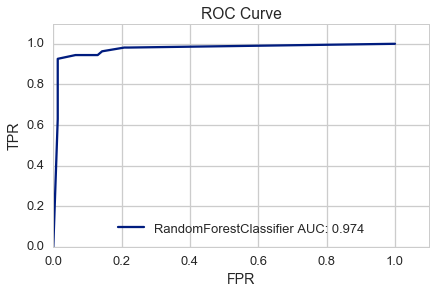

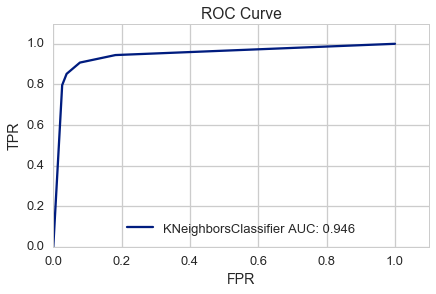

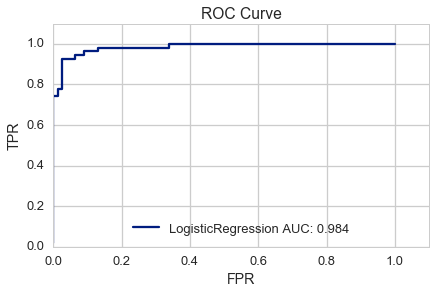

In [320]:
for model in models:
    prob = model.fit(X_train, y_train).predict_proba(X_test)
    precision, recall, threshold = precision_recall_curve(y_test, prob[:,1], pos_label='republican')
    fpr, tpr, threshold = roc_curve(y_test, prob[:,1], pos_label='republican')
    plt.subplots()
    plt.xlim(0,1.1)
    plt.ylim(0,1.1)
    plt.plot(fpr, tpr, label=model.__str__().split('(')[0] + ' AUC: ' + str(auc(fpr, tpr))[:5])
    plt.legend(loc='lower center',fancybox=True, shadow=True)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('ROC Curve')

    


#### Exercise 6.3

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset

In [321]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', na_values=['?'], header=None)
df.columns=['age','year','positive_aux','survival']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age             306 non-null int64
year            306 non-null int64
positive_aux    306 non-null int64
survival        306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [322]:
X=df.iloc[:,0:3]
y=df.iloc[:,3]
y[y==2]=0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
y_pred = logreg.predict(X_test)

logreg=LogisticRegression()
logreg.fit(X_train, y_train)
print "Accuracy: %s" %accuracy_score(y_test, y_pred)
print("Precision: %s" %precision_score(y_test, y_pred))
print("Recall score: %s" %recall_score(y_test, y_pred))
print("F1_score: %s" %f1_score(y_test, y_pred))


Accuracy: 0.815217391304
Precision: 0.813186813187
Recall score: 1.0
F1_score: 0.89696969697


In [323]:
pred = logreg.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, pred[:,1])

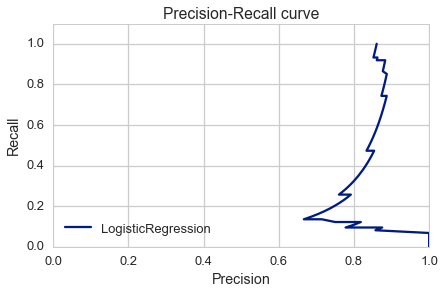

In [324]:
plt.plot(precision, recall, label=logreg.__str__().split('(')[0])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.xlim(0)
plt.ylim(0,1.1)
plt.title('Precision-Recall curve')
plt.legend(loc='lower left',fancybox=True, shadow=True);

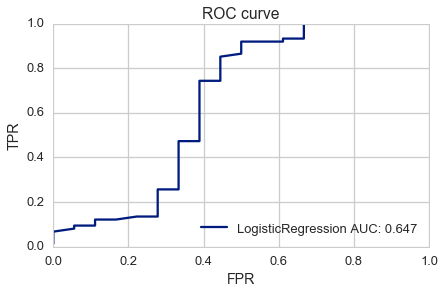

In [325]:
fpr, tpr, thresholds = roc_curve(y_test, pred[:, 1])
plt.plot(fpr, tpr, label=logreg.__str__().split('(')[0] + ' AUC: ' + str(auc(fpr, tpr))[:5])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='lower right',fancybox=True, shadow=True);